## Degree study

In [2]:
import networkx as nx

# Open adjencency list file and build the directed graph
f=open("../lightningAdjList_26Nov.txt", 'rb')
G=nx.read_multiline_adjlist(f)
f.close()

# Clean graph from smallest components
G = max(nx.connected_component_subgraphs(G), key=len)

print("Number of nodes: " + str(G.number_of_nodes()))
print("Number of edges: " + str(G.number_of_edges()))
print(G.degree("02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b"))

# Read alias file and create a pub_key -> alias dic
aliasDic = {}
f=open("../nodeAlias_26Nov.txt", 'r')

lines = f.read().splitlines()

for line in lines:
    pub_key = line[:66]
    alias = line[67:]
    aliasDic[pub_key] = alias
    
f.close()

Number of nodes: 1877
Number of edges: 12386
560


### Compute average degree of the network

In [2]:
# Get list with degrees of each node
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Get the average degree
average_degree = sum(degree_sequence)/len(degree_sequence)

print("Average degree: ", average_degree)



Average degree:  13.197655833777304


### Plot the degree distribution (unscaled)

In [3]:
import matplotlib.pyplot as plt
import collections

# Dic with how much time each degree appeared
degreeCount = collections.Counter(degree_sequence)

# Separate dic into two separated tuples
deg, cnt = zip(*degreeCount.items())
cnt = list(cnt)

# Normalize cnt in cnt_norm getting %
total_sum = sum(cnt)
cnt_norm = []
for i in range(len(cnt)):
    cnt_norm += [cnt[i]/total_sum]
    
    
ax = plt.subplot()
plt.bar(deg, cnt_norm, width=0.5, color='b', tick_label=[d for d in deg])
plt.plot(deg, cnt_norm, linestyle='--')
plt.title("Degree Distribution")
plt.ylabel("Probability P(k)")
plt.xlabel("Degree k")

plt.xticks([258])

plt.show()


<Figure size 640x480 with 1 Axes>

### Compute the gamma value of the network

In [4]:


import powerlaw as pl
        
# Fits the parameters of the distribution to the data.
fit = pl.Fit(degree_sequence)

print(len(degree_sequence))

print("Gama value of network: ", fit.alpha)



1877
Gama value of network:  2.143546420101135


Calculating best minimal value for power law fit
/home/joao/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


We conclude it is a scale free 

### Plot the power law (log scaled)

Text(0.5, 0, 'Degree k')

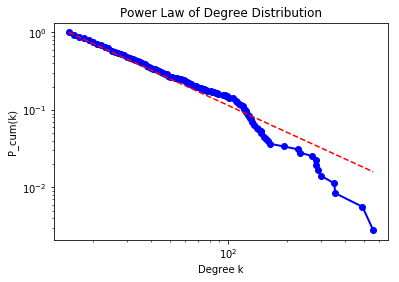

In [5]:
fig1 = fit.plot_ccdf(color = 'b', marker='o', linewidth= 2)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig1)


plt.title("Power Law of Degree Distribution")
plt.ylabel("P_cum(k)")
plt.xlabel("Degree k")

Not a mesh network as some people wished. More scale-free

## Betweenness Centrality

In [6]:
import operator

# Get the betweenness centrality of all the nodes
betweennessDic = nx.betweenness_centrality(G)
# Get the sorted betweenness centrality
sorted_betweenness = sorted(betweennessDic.items(), key=operator.itemgetter(1), reverse=True)
# Only the best 10 will be considered
sorted_betweenness = list(sorted_betweenness[0:10])
# Get two lists, one with the addresses and one with the corresponding betweenness centrality measure
addresses_bc, betweenness = zip(*sorted_betweenness)

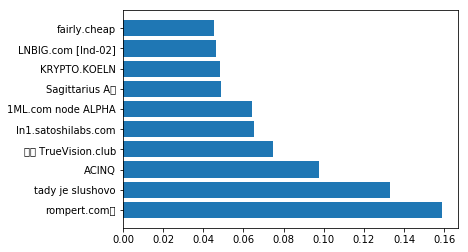

In [11]:
degrees_t10_bc = []

for i in range(len(addresses_bc)):
    degrees_t10_bc.append(G.degree(addresses_bc[i]))


# Get alias instead of addresses
alias = list(addresses_bc)
for i, address in enumerate(alias):
    alias[i] = aliasDic[address]

plt.figure()
plt.barh(range(len(betweenness)),betweenness)
plt.yticks(range(len(addresses_bc)), alias)

plt.show()

In [ ]:
plt.figure()
plt.plot(degrees_t10_bc, betweenness, 'o')
plt.show()

We can see that for the top 10 nodes with the biggest betweenness centrality, there is a linearly proportional reason with the degree of the corresponding nodes. Below is a plot with for the top 100, to test that this is indeed true.

In [ ]:
sorted_betweenness = sorted(betweennessDic.items(), key=operator.itemgetter(1), reverse=True)
# Only the best 10 will be considered
sorted_betweenness = list(sorted_betweenness[0:100])
# Get two lists, one with the airport codes and one with the corresponding betweenness centrality measure
addresses_bc, betweenness = zip(*sorted_betweenness)


degrees_t10_bc = []

for i in range(len(addresses_bc)):
    degrees_t10_bc.append(G.degree(addresses_bc[i]))
    
    
plt.figure()
plt.plot(degrees_t10_bc, betweenness, 'o')
plt.show()